# 数据处理04：Python数学绘图库Matplotlib
Matplotlib 是一个用于实现数据可视化的绘图工具包，可以根据各种数据生成不同类型的精美图形，并具有良好的跨平台兼容性。项目官网 https://matplotlib.org/
![04_matplotlib.png](https://upload-images.jianshu.io/upload_images/10829283-bb6afe5a973b27f8.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

Matplotlib 已包含于 Anaconda 中，导入时请按惯例命名为 mpl：

In [1]:
import matplotlib as mpl
mpl.__version__
# 以下语句可将配置参数重置为默认值
# mpl.rcParams.update(mpl.rcParamsDefault)

'3.0.3'

Matplotlib 默认使用的西文字库并不支持大字符集，以下代码通过指定中文字库文件路径创建了一个备用的字体属性对象，这是解决中文显示问题的一种简便办法：

In [2]:
from matplotlib.font_manager import FontProperties
cfont = FontProperties(fname="/usr/share/fonts/truetype/wqy/wqy-microhei.ttc")
# cfont = FontProperties(fname=r"C:\Windows\Fonts\simhei.ttf")

Matplotlib 绘图时通常使用其中的 pyplot 模块，约定的别名为 plt，其 API 接口的风格与商业数学软件 MATLAB 保持一致。以下代码引入了 pyplot 模块，还使用 IPython 的魔法命令来设定 Matplotlib 使用 inline 显示方式即输出为“内联”的图像——你也可以选择 notebook 方式，它专用于 Jupyter 笔记本页面，带有图像缩放和平移等附加交互功能。

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook

Matplotlib 包含大量的绘图工具，本文只能做简要的入门介绍，更多细节请参阅官方文档 https://matplotlib.org/contents.html

在开始绘图之前，让我们首先生成 30 个标准正态分布的伪随机数作为练习数据：

In [4]:
import numpy as np
i = np.random.standard_normal(30)
i

array([-0.2532012 , -1.29343459,  0.07320575, -1.52010079,  0.82564831,
        0.27406167,  0.30243022,  0.64730146, -0.04010628, -0.15134139,
       -0.94871487, -2.75593527,  0.86729323, -1.29122139, -1.90971017,
       -0.53414539,  0.55514836, -0.54891386, -0.58034988, -1.09599606,
       -0.87817823,  0.2064447 ,  1.42752673,  0.38388544, -0.42568998,
        0.95558107, -0.29279874, -0.44611704,  0.70763392, -1.81109587])

最基本的二维绘图函数是 plt.plot()，原则上它需要两组数值作为参数，分别表示横坐标值和纵坐标值。但也可以只传入一个序列，这时是根据序列的索引和值来绘图，默认类型为简单的线图：

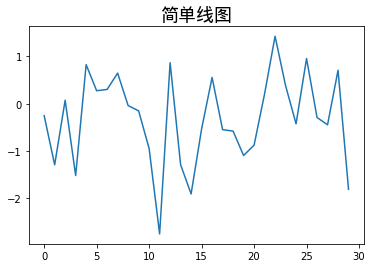

In [5]:
plt.plot(i);
plt.title("简单线图", fontproperties=cfont, fontsize=18);

可以看到图形的横坐标就是数组索引，纵坐标则是数组的值。运行程序文件时应在最后调用 plt.show() 函数显示图形，在交互模式下则不需要。这段代码还调用了 plt.title() 函数来设置标题文本，注意要显示汉字就必须以 fontproperties 参数指定之前创建的字体属性对象。

在数据参数之后还可以传入一个字符串参数来设定图形样式，包括颜色、标记和线型，三者都是可选项，如省略则会显示默认样式。以下代码新加了一条正弦图形，所用的样式“ro:”表示红色、圆形标记、点虚线：

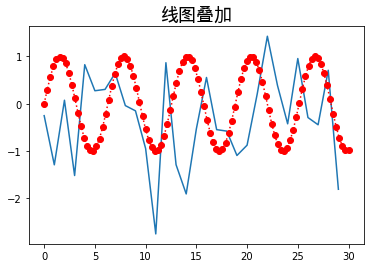

In [6]:
plt.plot(i)
plt.title("线图叠加", fontproperties=cfont, fontsize=18)
j = np.linspace(0, 30, 100)  # 0到30之间均匀间隔的100个数值（默认50个）
plt.plot(j, np.sin(j), "ro:");

样式字符串可用颜色符有红绿蓝青品黄黑白（rgbcmykw），可用线型符有“-”“--”“-.”和“:”，以下代码新加了演示可用标记符的语句，plt.plot() 函数还有许多关键字参数，例如设置标记大小的 markersize 和设置标签的 label，调用 plt.legend() 即可显示图例：

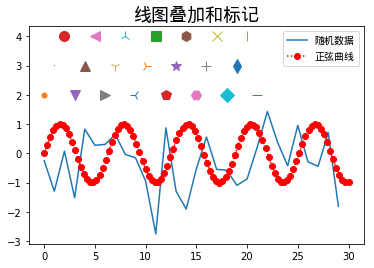

In [7]:
plt.plot(i, label="随机数据")
plt.title("线图叠加和标记", fontproperties=cfont, fontsize=18)
j = np.linspace(0, 30, 100)
plt.plot(j, np.sin(j), "ro:", label="正弦曲线")
k = 0
for marker in ".,ov^<>1234sp*hH+xDd|_":
    plt.plot(k, k%3+2, marker, markersize=10)
    k += 1
plt.legend(prop=cfont);

使用其他函数可以绘制不同种类的图形，例如适用于多维数据可视化的 plt.scatter() 函数，以下代码是使用随机的位置大小颜色数据生成散点图的例子：

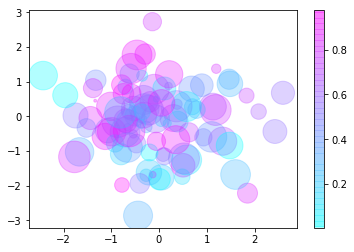

In [8]:
x = np.random.randn(100)
y = np.random.randn(100)
colors = np.random.rand(100)
sizes = 1000 * np.random.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap="cool")  # 位置/颜色/大小/透明度/颜色映射集
plt.colorbar();

对于包含多个子图的复杂场景，推荐使用 Matplotlib 的面向对象接口：下面的例子调用 plt.subplots() 函数创建两个子图，然后调用每个子图对应轴域（Axes）对象的方法分别绘制不同的图形：

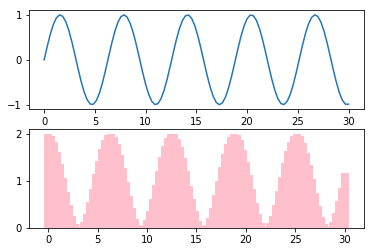

In [9]:
# 面向对象接口，使用 Figure 和 Axes 的方法
fig, ax = plt.subplots(2)
ax[0].plot(j, np.sin(j))
ax[1].bar(j, np.cos(j)+1, color="pink");

接下来的例子是用 Matplotlib 绘图来展示 Python 官方文档中文翻译项目的进度，注意读取数据后需要将索引设为时间类型：

In [10]:
import pandas as pd
# 短网址对应的原文件
# https://gitee.com/freesand/pyStudy/raw/master/data/py_cn.csv
# py_cn = pd.read_csv("http://t.cn/EaRaPhp")
py_cn = pd.read_csv("py_cn.csv")
py_cn.index = pd.to_datetime(py_cn.date)
py_cn.tail()

,date,percent
date,,
2019-04-13,2019/04/13,0.27
2019-04-14,2019/04/14,0.28
2019-04-16,2019/04/16,0.29
2019-04-20,2019/04/20,0.30
2019-04-23,2019/04/23,0.31


这段程序选择了更漂亮的 ggplot 图形风格，并用到了更多的图形元素例如为关键数据点添加注释信息等：

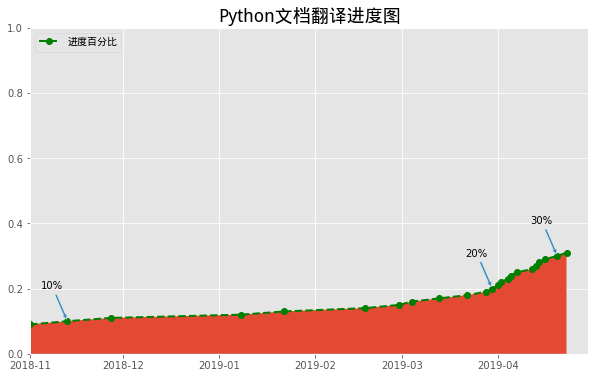

In [11]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use("ggplot")  # 设置图形风格，可用的风格见plt.style.available，默认值为"default"
plt.figure(figsize=(10, 6))  # 设置图像大小，单位为英寸
ax = plt.axes()  # 创建轴域
ax.set_title("Python文档翻译进度图", fontproperties=cfont, fontsize=18)
ax.set(ylim=(0, 1), xlim=(pd.to_datetime("2018/11/01"), pd.to_datetime("2019/04/30")))
d = pd.to_datetime("2018/11/13"), pd.to_datetime("2019/03/30"), pd.to_datetime("2019/04/20")
delta = pd.Timedelta(days=5)
ax.annotate("10%", xy=(d[0], .1), xytext=(d[0]-delta, .2), ha="center", arrowprops=dict(arrowstyle="simple"))
ax.annotate("20%", xy=(d[1], .2), xytext=(d[1]-delta, .3), ha="center", arrowprops=dict(arrowstyle="simple"))
ax.annotate("30%", xy=(d[2], .3), xytext=(d[2]-delta, .4), ha="center", arrowprops=dict(arrowstyle="simple"))
ax.plot(py_cn.index, py_cn.percent, "go--", linewidth=2, label="进度百分比")
ax.fill_between(py_cn.index, py_cn.percent)
ax.legend(prop=cfont, loc="upper left");

中文版文档翻译进度达到 20% 时已被官方加入到语言选择框，可以看到在随后这段时间里速度明显提升，有更多志愿者参与其中，当然距离最终完成还有很长的路要走……希望大家继续关注这个项目 https://github.com/python/python-docs-zh-cn

——编程原来是这样……